# **LAB 3 - PART 2 Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import yfinance as yf
from sklearn import model_selection


In [ ]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [ ]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

start_date = datetime(2018, 12, 31)
end_date = datetime(2023, 12, 31)

stk_data = yf.download(stk_tickers , start=start_date, end=end_date)
ccy_data = web.DataReader(ccy_tickers, 'fred' , start=start_date, end=end_date)
idx_data = web.DataReader(idx_tickers, 'fred' , start=start_date, end=end_date)
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [ ]:
stk_data

Price        Adj Close                               Close              \
Ticker           GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   84.379448   96.272552   52.248001  108.671127   
2019-01-02   52.734001   85.522598   95.846039   52.734001  110.143402   
2019-01-03   51.273499   83.815285   92.320053   51.273499  107.944550   
2019-01-04   53.903500   87.088905   96.613785   53.903500  112.160614   
2019-01-07   53.796001   87.705025   96.736992   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2023-12-22  141.490005  160.675140  373.888580  141.490005  162.139999   
2023-12-26  141.520004  161.735489  373.968445  141.520004  163.210007   
2023-12-27  140.369995  161.983231  373.379547  140.369995  163.460007   
2023-12-28  140.229996  162.270599  374.587280  140.229996  163.750000   
2023-12-29  139.690002  162.072403  375.345886  139.690002  163.550003   

Price                         High                                 Low  \
Ticker            MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2023-12-22  374.579987  141.990005  162.410004  375.179993  140.710007   
2023-12-26  374.660004  142.679993  163.309998  376.940002  141.190002   
2023-12-27  374.070007  142.080002  163.639999  375.059998  139.889999   
2023-12-28  375.279999  141.139999  163.960007  376.459991  139.750000   
2023-12-29  376.040009  140.360001  164.179993  377.160004  138.779999   

Price                                     Open                          \
Ticker             IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2023-12-22  161.000000  372.709991  140.770004  161.100006  373.679993   
2023-12-26  162.050003  373.500000  141.589996  162.229996  375.000000   
2023-12-27  162.679993  372.809998  141.589996  163.139999  373.690002   
2023-12-28  163.399994  374.160004  140.779999  163.960007  375.369995   
2023-12-29  162.830002  373.480011  139.630005  163.750000  376.000000   

Price         Volume                     
Ticker         GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-12-22  26514600  2439800  17091100  
2023-12-26  16780300  1772400  12673100  
2023-12-27  19628600  3234600  14905400  
2023-12-28  16045700  2071300  14327000  
2023-12-29  18727200  2525600  18723000  

[1259 rows x 18 columns]

In [ ]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2018-12-31,109.70,1.2763
2019-01-01,NaN,NaN
2019-01-02,109.22,1.2598
2019-01-03,108.07,1.2633
2019-01-04,108.29,1.2740
...,...,...
2023-12-25,NaN,NaN
2023-12-26,142.48,1.2709
2023-12-27,142.05,1.2797


In [ ]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2018-12-31,2506.85,23327.46,25.42
2019-01-01,NaN,NaN,NaN
2019-01-02,2510.03,23346.24,23.22
2019-01-03,2447.89,22686.22,25.45
2019-01-04,2531.94,23433.16,21.38
...,...,...,...
2023-12-25,NaN,NaN,NaN
2023-12-26,4774.75,37545.33,12.99
2023-12-27,4781.58,37656.52,12.43


Let's
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [ ]:
### START CODE HERE ###
# base = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')])
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###

In [ ]:
base

Date
2018-12-31     96.272552
2019-01-02     95.846039
2019-01-03     92.320053
2019-01-04     96.613785
2019-01-07     96.736992
                 ...    
2023-12-22    373.888580
2023-12-26    373.968445
2023-12-27    373.379547
2023-12-28    374.587280
2023-12-29    375.345886
Name: (Adj Close, MSFT), Length: 1259, dtype: float64

**Standardize `X1-3`**

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.


In [ ]:
### START CODE HERE ###

standard_scaler = preprocessing.StandardScaler()

X1_standardized = standard_scaler.fit_transform(X1)
X2_standardized = standard_scaler.fit_transform(X2)
X3_standardized = standard_scaler.fit_transform(X3)

X1 = pd.DataFrame(X1_standardized, index=X1.index, columns=X1.columns)
X2 = pd.DataFrame(X2_standardized, index=X2.index, columns=X2.columns)
X3 = pd.DataFrame(X3_standardized, index=X3.index, columns=X3.columns)


### END CODE HERE ###

In [ ]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2018-12-31,-0.655877,-0.106929
2019-01-01,NaN,NaN
2019-01-02,-0.687966,-0.355544
2019-01-03,-0.764847,-0.302807
2019-01-04,-0.750139,-0.141584
...,...,...
2023-12-25,NaN,NaN
2023-12-26,1.535564,-0.188294
2023-12-27,1.506818,-0.055699


Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [ ]:
### START CODE HERE ###

return_period = 3
k = [3, 6, 12]

Y = base.shift(-return_period)


X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period).shift(-k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period).shift(-k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period).shift(-k[2]*return_period)})

X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)

### END CODE HERE ###

In [ ]:
Y

Date
2018-12-31     96.613785
2019-01-02     96.736992
2019-01-03     97.438408
2019-01-04     98.831726
2019-01-07     98.196678
                 ...    
2023-12-22    374.587280
2023-12-26    375.345886
2023-12-27           NaN
2023-12-28           NaN
2023-12-29           NaN
Name: (Adj Close, MSFT), Length: 1259, dtype: float64

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [ ]:
### START CODE HERE ###

X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([X, Y], axis=1)


### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [ ]:
dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
2018-12-31,-1.545902,-1.988830,-0.655877,-0.106929,-1.966814,-1.936177,0.494033,0.454964,3.326920,9.358940,96.613785
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-1.529536,-1.914432,-0.687966,-0.355544,-1.961803,-1.931345,0.226239,3.687088,1.725067,10.375626,96.736992
2019-01-03,-1.578717,-2.025547,-0.764847,-0.302807,-2.059734,-2.101157,0.497684,7.563797,8.511620,14.634583,97.438408
2019-01-04,-1.490155,-1.812494,-0.750139,-0.141584,-1.927273,-1.908982,0.002266,3.971458,2.369591,10.159981,98.831726
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-26,1.460202,3.045630,1.535564,-0.188294,1.607350,1.721828,-1.019002,NaN,NaN,NaN,375.345886
2023-12-27,1.421477,3.061753,1.506818,-0.055699,1.618114,1.750436,-1.087168,NaN,NaN,NaN,NaN
2023-12-28,1.416763,3.080456,1.441970,-0.137064,1.620903,1.764221,-1.082299,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [ ]:
### START CODE HERE ###
dataset = dataset.dropna()
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1208 entries, 2018-12-31 to 2023-11-07
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1208 non-null   float64
 1   (Adj Close, IBM)    1208 non-null   float64
 2   DEXJPUS             1208 non-null   float64
 3   DEXUSUK             1208 non-null   float64
 4   SP500               1208 non-null   float64
 5   DJIA                1208 non-null   float64
 6   VIXCLS              1208 non-null   float64
 7   MSFT_3DT            1208 non-null   float64
 8   MSFT_6DT            1208 non-null   float64
 9   MSFT_12DT           1208 non-null   float64
 10  (Adj Close, MSFT)   1208 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB


,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000
mean,-0.036086,-0.076746,-0.051531,0.010019,-0.038676,-0.038766,0.033086,2.012916,4.023290,8.027755,227.851461
std,0.990450,0.896879,0.966869,1.012945,0.987276,0.987285,1.005890,11.201485,15.500318,20.691970,70.280515
min,-1.578717,-2.632217,-1.135881,-3.210847,-2.391462,-3.154545,-1.195502,-33.837585,-52.401428,-60.583984,96.613785
25%,-0.995078,-0.771103,-0.762340,-0.723946,-1.007232,-0.969069,-0.631005,-3.078169,-4.457874,-1.809696,165.204453
50%,0.008199,-0.091889,-0.602394,0.030186,0.216170,0.239205,-0.194319,2.510902,4.747051,9.168541,237.787933
75%,0.814103,0.510843,0.885252,0.725931,0.809644,0.821251,0.480643,8.704479,13.063194,20.518215,283.788338
max,1.740315,2.074343,2.135904,2.040199,1.641722,1.529978,7.465190,35.173431,48.618134,72.843079,368.240265


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [ ]:
### START CODE HERE ###
Y = dataset[('Adj Close', 'MSFT')]

X = dataset.drop([('Adj Close', 'MSFT')],axis=1)

### END CODE HERE ###

**Calculate the Correlation**

Drop columns that have correlation more than 0.9.

In [ ]:
### START CODE HERE ###

correlation_matrix = X.corr()


highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Show Dropped Columns
print("Dropped Columns:")
print(highly_correlated_columns)

# Drop highly correlated columns from the DataFrame
X = X.drop(columns=highly_correlated_columns)

### END CODE HERE ###

Dropped Columns:
{'SP500', 'DJIA'}


In [ ]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2018-12-31,-1.545902,-1.988830,-0.655877,-0.106929,0.494033,0.454964,3.326920,9.358940
2019-01-02,-1.529536,-1.914432,-0.687966,-0.355544,0.226239,3.687088,1.725067,10.375626
2019-01-03,-1.578717,-2.025547,-0.764847,-0.302807,0.497684,7.563797,8.511620,14.634583
2019-01-04,-1.490155,-1.812494,-0.750139,-0.141584,0.002266,3.971458,2.369591,10.159981
2019-01-07,-1.493775,-1.772396,-0.728078,-0.115970,0.004700,5.355331,0.682480,9.903503
...,...,...,...,...,...,...,...,...
2023-11-01,0.952741,1.791839,2.102478,-1.065226,-0.546711,24.106354,37.262085,29.157043
2023-11-02,0.987762,1.894510,2.070388,-0.992902,-0.693998,22.014832,31.177856,26.995605
2023-11-03,1.041977,1.951265,1.995513,-0.693057,-0.785291,24.040192,26.775116,21.944061
2023-11-06,1.080701,2.019499,2.022923,-0.667442,-0.787726,14.016235,18.667633,19.436188


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [ ]:
### START CODE HERE ###
test_size = 0.3
train_size = 0.7
X_train, X_test = train_test_split(X,test_size=test_size)
Y_train, Y_test = train_test_split(Y,test_size=test_size)


### START CODE HERE ###

In [ ]:
X_train.columns = ['Adj Close, GOOGL' , 'Adj Close, IBM',	'DEXJPUS'	,'DEXUSUK'	, 'VIXCLS','MSFT_3DT',	'MSFT_6DT'	,'MSFT_12DT']
X_test.columns = ['Adj Close, GOOGL' , 'Adj Close, IBM',	'DEXJPUS'	,'DEXUSUK'	,	'VIXCLS','MSFT_3DT',	'MSFT_6DT'	,'MSFT_12DT']

X_train.index = pd.to_datetime(X_train.index)
X_train = X_train.sort_index()

X_test.index = pd.to_datetime(X_test.index)
X_test = X_test.sort_index()

Y_train.index = pd.to_datetime(Y_train.index)
Y_train = Y_train.sort_index()

Y_test.index = pd.to_datetime(Y_test.index)
Y_test = Y_test.sort_index()

Y_test_df = pd.DataFrame(Y_test.array,columns=['Adj Close,MSFT'],index=Y_test.index)
Y_test_df.index = pd.to_datetime(Y_test_df.index)
Y_test_df = Y_test_df.sort_index()

In [ ]:
Y_test

2018-12-31     96.613785
2019-01-03     97.438408
2019-01-10     99.533127
2019-01-11     99.883850
2019-01-15    102.092323
                 ...    
2023-10-20    339.352417
2023-10-23    326.621857
2023-10-25    336.005402
2023-10-27    344.731537
2023-11-06    359.294983
Name: (Adj Close, MSFT), Length: 363, dtype: float64

### **Grid Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- Your parameters are assigned according to Lab direction.
- `Linear Regression: {'fit_intercept': [True, False]}`
- `SVR: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###

svr_model = SVR()
kernels = ['linear','rbf']
grid_search_c_value = [0.1,10, 100]
grid_search_gamma = [0.01,0.1,1]
grid_search_degree = [2,3]

# Define the hyperparameter grid for the grid search
param_grid = {
    'kernel': kernels,
    'C': grid_search_c_value,
    'gamma': grid_search_gamma,
    'degree': grid_search_degree
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svr_model, param_grid, cv=4, scoring='neg_mean_squared_error',verbose = 10)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best model
best_params_svr = grid_search.best_params_

best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params_svr)

# Make predictions using the best model
prediction_svr = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, prediction_svr)
print("Mean Squared Error:", mse)













### END CODE HERE ###

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV 1/4; 1/36] START C=0.1, degree=2, gamma=0.01, kernel=linear.................
[CV 1/4; 1/36] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=-7280.384 total time=   0.1s
[CV 2/4; 1/36] START C=0.1, degree=2, gamma=0.01, kernel=linear.................
[CV 2/4; 1/36] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=-1136.579 total time=   0.1s
[CV 3/4; 1/36] START C=0.1, degree=2, gamma=0.01, kernel=linear.................
[CV 3/4; 1/36] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=-1094.790 total time=   0.1s
[CV 4/4; 1/36] START C=0.1, degree=2, gamma=0.01, kernel=linear.................
[CV 4/4; 1/36] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=-3198.342 total time=   0.1s
[CV 1/4; 2/36] START C=0.1, degree=2, gamma=0.01, kernel=rbf....................
[CV 1/4; 2/36] END C=0.1, degree=2, gamma=0.01, kernel=rbf;, score=-16489.728 total time=   0.1s
[CV 2/4; 2/36] START C=0.1, degree=2, ga

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [ ]:
mse = mean_squared_error(Y_test, prediction_svr)
print("Mean Squared Error:", mse)

Mean Squared Error: 762.7713912504009


In [ ]:
### START CODE HERE ###

#define model
linear_regression_model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}
k = [4,6]

grid_search = GridSearchCV(linear_regression_model, param_grid, cv = 6, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = LinearRegression(**best_params)
best_model.fit(X_train, Y_train)

# Make predictions on the test set
predictions_linear = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, predictions_linear)
rmse = np.sqrt(mse)

print(f"Best Model - MSE: {rmse}")

# print(f"Best Model - Intercept: {best_model.intercept_}")
# print(f"Best Model - Coefficients: {best_model.coef_}")
# predictions




### END CODE HERE ###

Best Model - MSE: 27.803214490030793


In [ ]:
predictions_linear

array([133.1471441 , 132.88170116, 132.35580252, 134.09921902,
       136.19191832, 136.85300476, 136.64386493, 138.49345857,
       135.54924299, 135.08003018, 137.65128317, 138.95748272,
       145.49369097, 142.16252289, 142.17592518, 143.82669506,
       142.91114091, 143.58213262, 146.38166503, 143.71146639,
       143.02676704, 144.42120576, 147.6332094 , 146.27732448,
       149.43381553, 145.81130899, 136.1775306 , 137.5968462 ,
       136.31458279, 138.29359204, 139.58411149, 141.83606283,
       139.42174709, 131.10082853, 128.26190215, 124.82559265,
       127.60296756, 124.80646902, 127.73747736, 127.9848021 ,
       123.41468725, 134.35960224, 134.41821578, 137.53112017,
       135.04849152, 139.38405716, 133.46581348, 132.7676366 ,
       138.38431911, 137.29317428, 136.67905763, 135.31404119,
       140.06977086, 140.1955079 , 138.88452825, 138.06792274,
       140.22620435, 139.30656299, 141.02536115, 144.13212898,
       142.91838715, 141.95518186, 145.09462631, 148.67

Utilize the best parameters obtained from grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the compared dataframe with the Y_train.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
![image.png](attachment:image.png)

</details>

In [ ]:
Y_grid_search_linear = pd.DataFrame(predictions_linear, columns=["Linear Regression by grid search"], index=Y_test_df.index)
Y_grid_search_svr = pd.DataFrame(prediction_svr, columns=["SVR by grid search"], index=Y_test_df.index)

In [ ]:
Y_grid_search_linear

,Linear Regression by grid search
2018-12-31,133.147144
2019-01-03,132.881701
2019-01-10,132.355803
2019-01-11,134.099219
2019-01-15,136.191918
...,...
2023-10-20,374.465457
2023-10-23,377.437018
2023-10-25,344.480219
2023-10-27,347.480028


In [ ]:
Y_grid_search_svr

,SVR by grid search
2018-12-31,136.119071
2019-01-03,135.703758
2019-01-10,133.597531
2019-01-11,134.922204
2019-01-15,137.078237
...,...
2023-10-20,375.390307
2023-10-23,378.395504
2023-10-25,345.169609
2023-10-27,346.996712


In [ ]:
Y_test_df

,"Adj Close,MSFT"
2018-12-31,96.613785
2019-01-03,97.438408
2019-01-10,99.533127
2019-01-11,99.883850
2019-01-15,102.092323
...,...
2023-10-20,339.352417
2023-10-23,326.621857
2023-10-25,336.005402
2023-10-27,344.731537


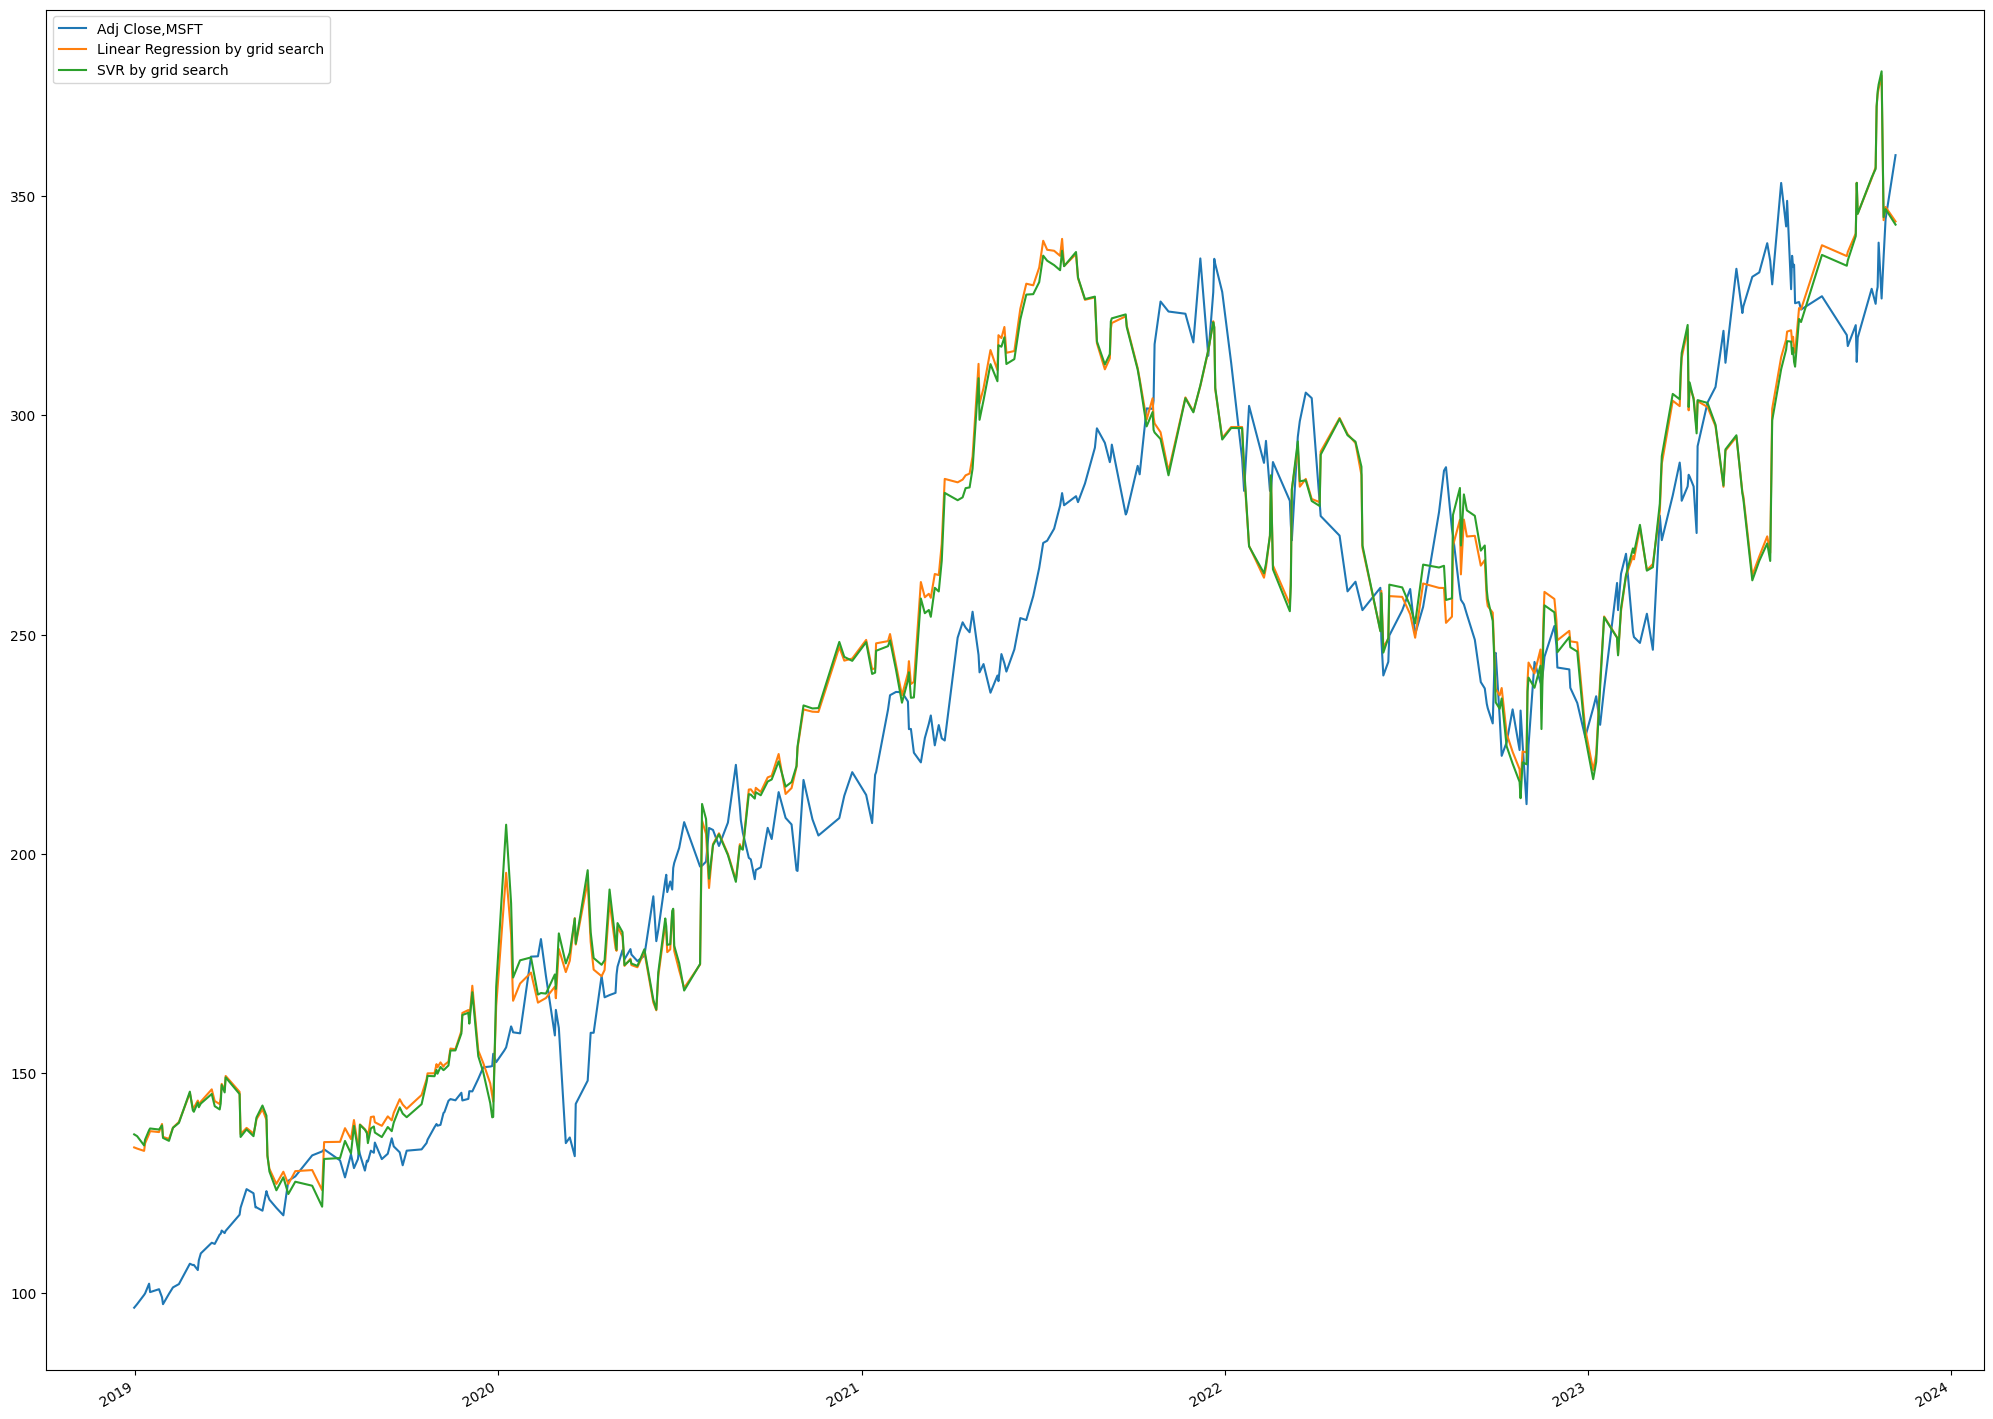

In [ ]:
df_grid = pd.concat([Y_test_df, Y_grid_search_linear,Y_grid_search_svr], axis=1)
# df_grid = df_grid.dropna()
lines = df_grid.plot.line(figsize=(25, 20))

In [ ]:
df_grid

,"Adj Close,MSFT",Linear Regression by grid search,SVR by grid search,"(Adj Close, MSFT)"
2018-12-31,96.613785,133.147144,136.119071,NaN
2019-01-02,NaN,NaN,NaN,96.736992
2019-01-03,97.438408,132.881701,135.703758,NaN
2019-01-04,NaN,NaN,NaN,98.831726
2019-01-07,NaN,NaN,NaN,98.196678
...,...,...,...,...
2023-11-01,NaN,NaN,NaN,355.151093
2023-11-02,NaN,NaN,NaN,359.135620
2023-11-03,NaN,NaN,NaN,361.795288
2023-11-06,359.294983,344.184913,343.461994,NaN


In [ ]:
df_grid.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Adj Close,MSFT                    0 non-null      float64
 1   Linear Regression by grid search  0 non-null      float64
 2   SVR by grid search                0 non-null      float64
 3   (Adj Close, MSFT)                 0 non-null      float64
dtypes: float64(4)
memory usage: 0.0 bytes


In [ ]:
### START CODE HERE ###




### END CODE HERE ###

### **Random Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `{'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'epsilon': [0.1, 1, 5], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###


linear_regression_model = LinearRegression()


param_grid = {'fit_intercept': [True, False]}

# Define the number of iterations for random search
n_iter = 60

# Define the scoring function
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Define RandomizedSearchCV parameters
randomized_search = RandomizedSearchCV(estimator=linear_regression_model,
                                       param_distributions=param_grid,
                                       n_iter=n_iter,
                                       scoring=scoring,
                                       cv=5)  # Specify the number of folds for cross-validation

# Fit the randomized search
randomized_search.fit(X_train, Y_train)
predict_random_linear = randomized_search.best_estimator_.predict(X_test)

# Get the mean and standard deviation of the scores for all parameter sets
mean_scores = randomized_search.cv_results_['mean_test_score']
std_scores = randomized_search.cv_results_['std_test_score']

# Print the mean and standard deviation for each parameter set
for mean_score, std_score, params in zip(mean_scores, std_scores, randomized_search.cv_results_['params']):
    print("Mean: {:.4f}, Std: {:.4f}, Parameters: {}".format(-mean_score, std_score, params))











### END CODE HERE ###

Mean: 1845.0992, Std: 1038.0077, Parameters: {'fit_intercept': True}
Mean: 190965.2064, Std: 48451.1759, Parameters: {'fit_intercept': False}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=60. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [ ]:
svr_model = SVR()

start_C = 1
end_C = 100
start_gamma = 0.01
end_gamma = 10
degrees = [2, 3]

# Generate 5 random values for C
random_C_values = np.random.uniform(start_C, end_C, 5)

# Generate 5 random values for gamma
random_gamma_values = np.random.uniform(start_gamma, end_gamma, 5)

# Choose 5 random values for degree from the list of available degrees
random_degree_values = np.random.choice(degrees, 5)

# Define the parameter distributions for random search
param_distributions = {
    'kernel': kernels,
    'C': random_C_values,
    'gamma': random_gamma_values,
    'degree': random_degree_values
}

# Define the number of iterations for random search
n_iter = 60

# Define RandomizedSearchCV parameters
randomized_search = RandomizedSearchCV(estimator=svr_model,
                                       param_distributions=param_distributions,
                                       n_iter=n_iter,
                                       scoring='neg_mean_squared_error',
                                       cv=5)  # Specify the number of folds for cross-validation

# Fit the randomized search
randomized_search.fit(X_train, Y_train)
predict_random_svr = randomized_search.best_estimator_.predict(X_test)

Utilize the best parameters obtained from random grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the comared dataframe with the Y_train.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
![image.png](attachment:image.png)

</details>

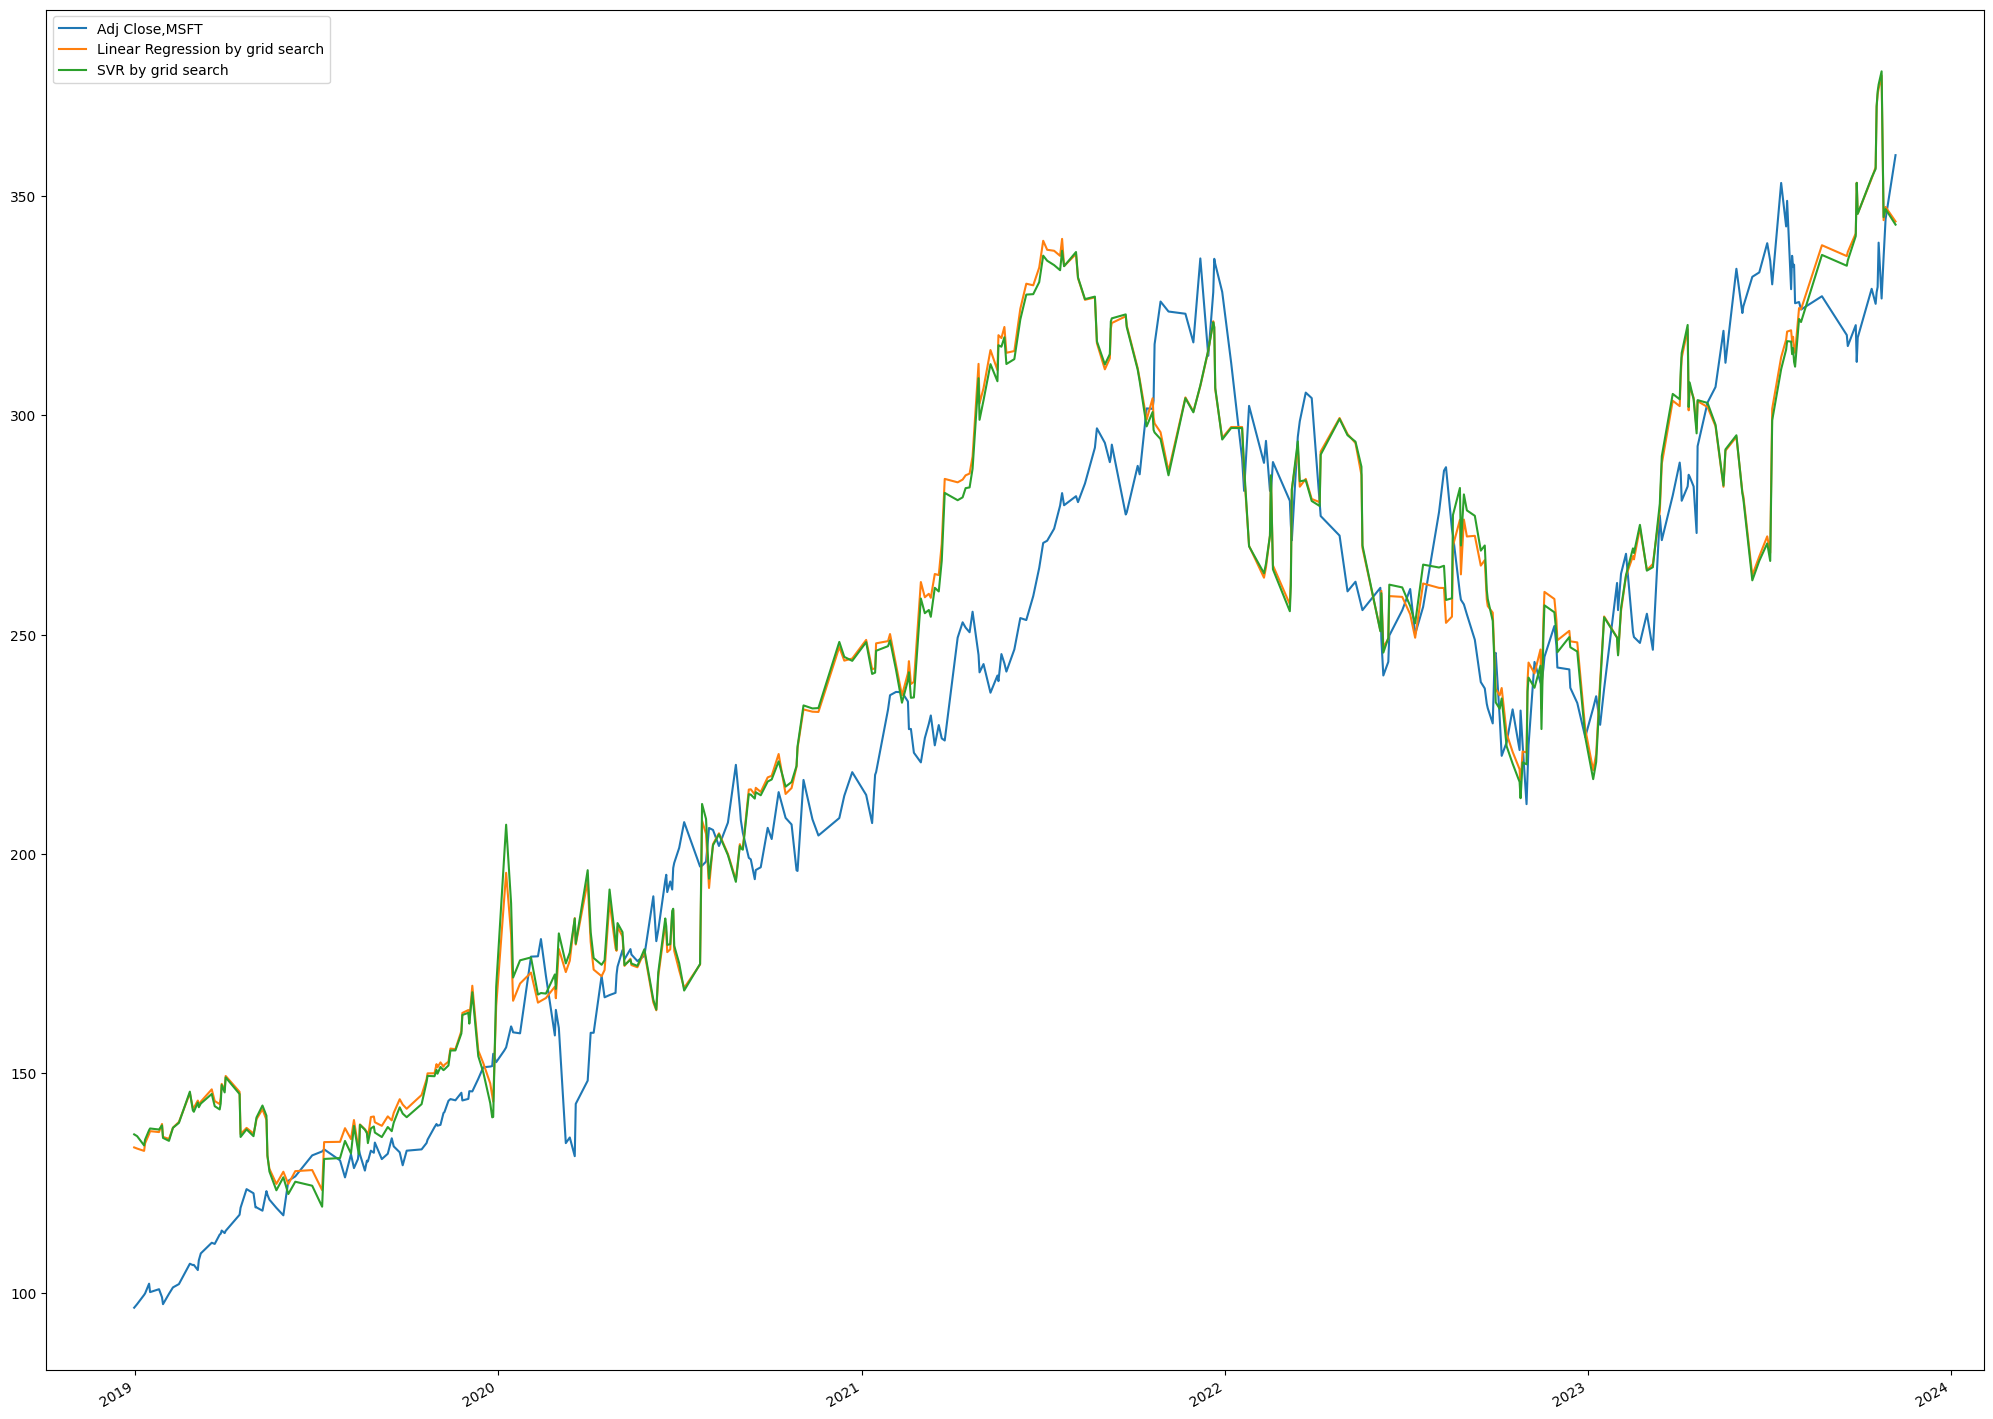

In [ ]:
### START CODE HERE ###

Y_random_linear = pd.DataFrame(predict_random_linear, columns=["Linear Regression by grid search"], index=Y_test_df.index)
Y_random_svr = pd.DataFrame(predict_random_svr, columns=["SVR by grid search"], index=Y_test_df.index)


df = pd.concat([Y_test_df, Y_grid_search_linear,Y_grid_search_svr], axis=1)
lines = df.plot.line(figsize=(25, 20))



### START CODE HERE ###

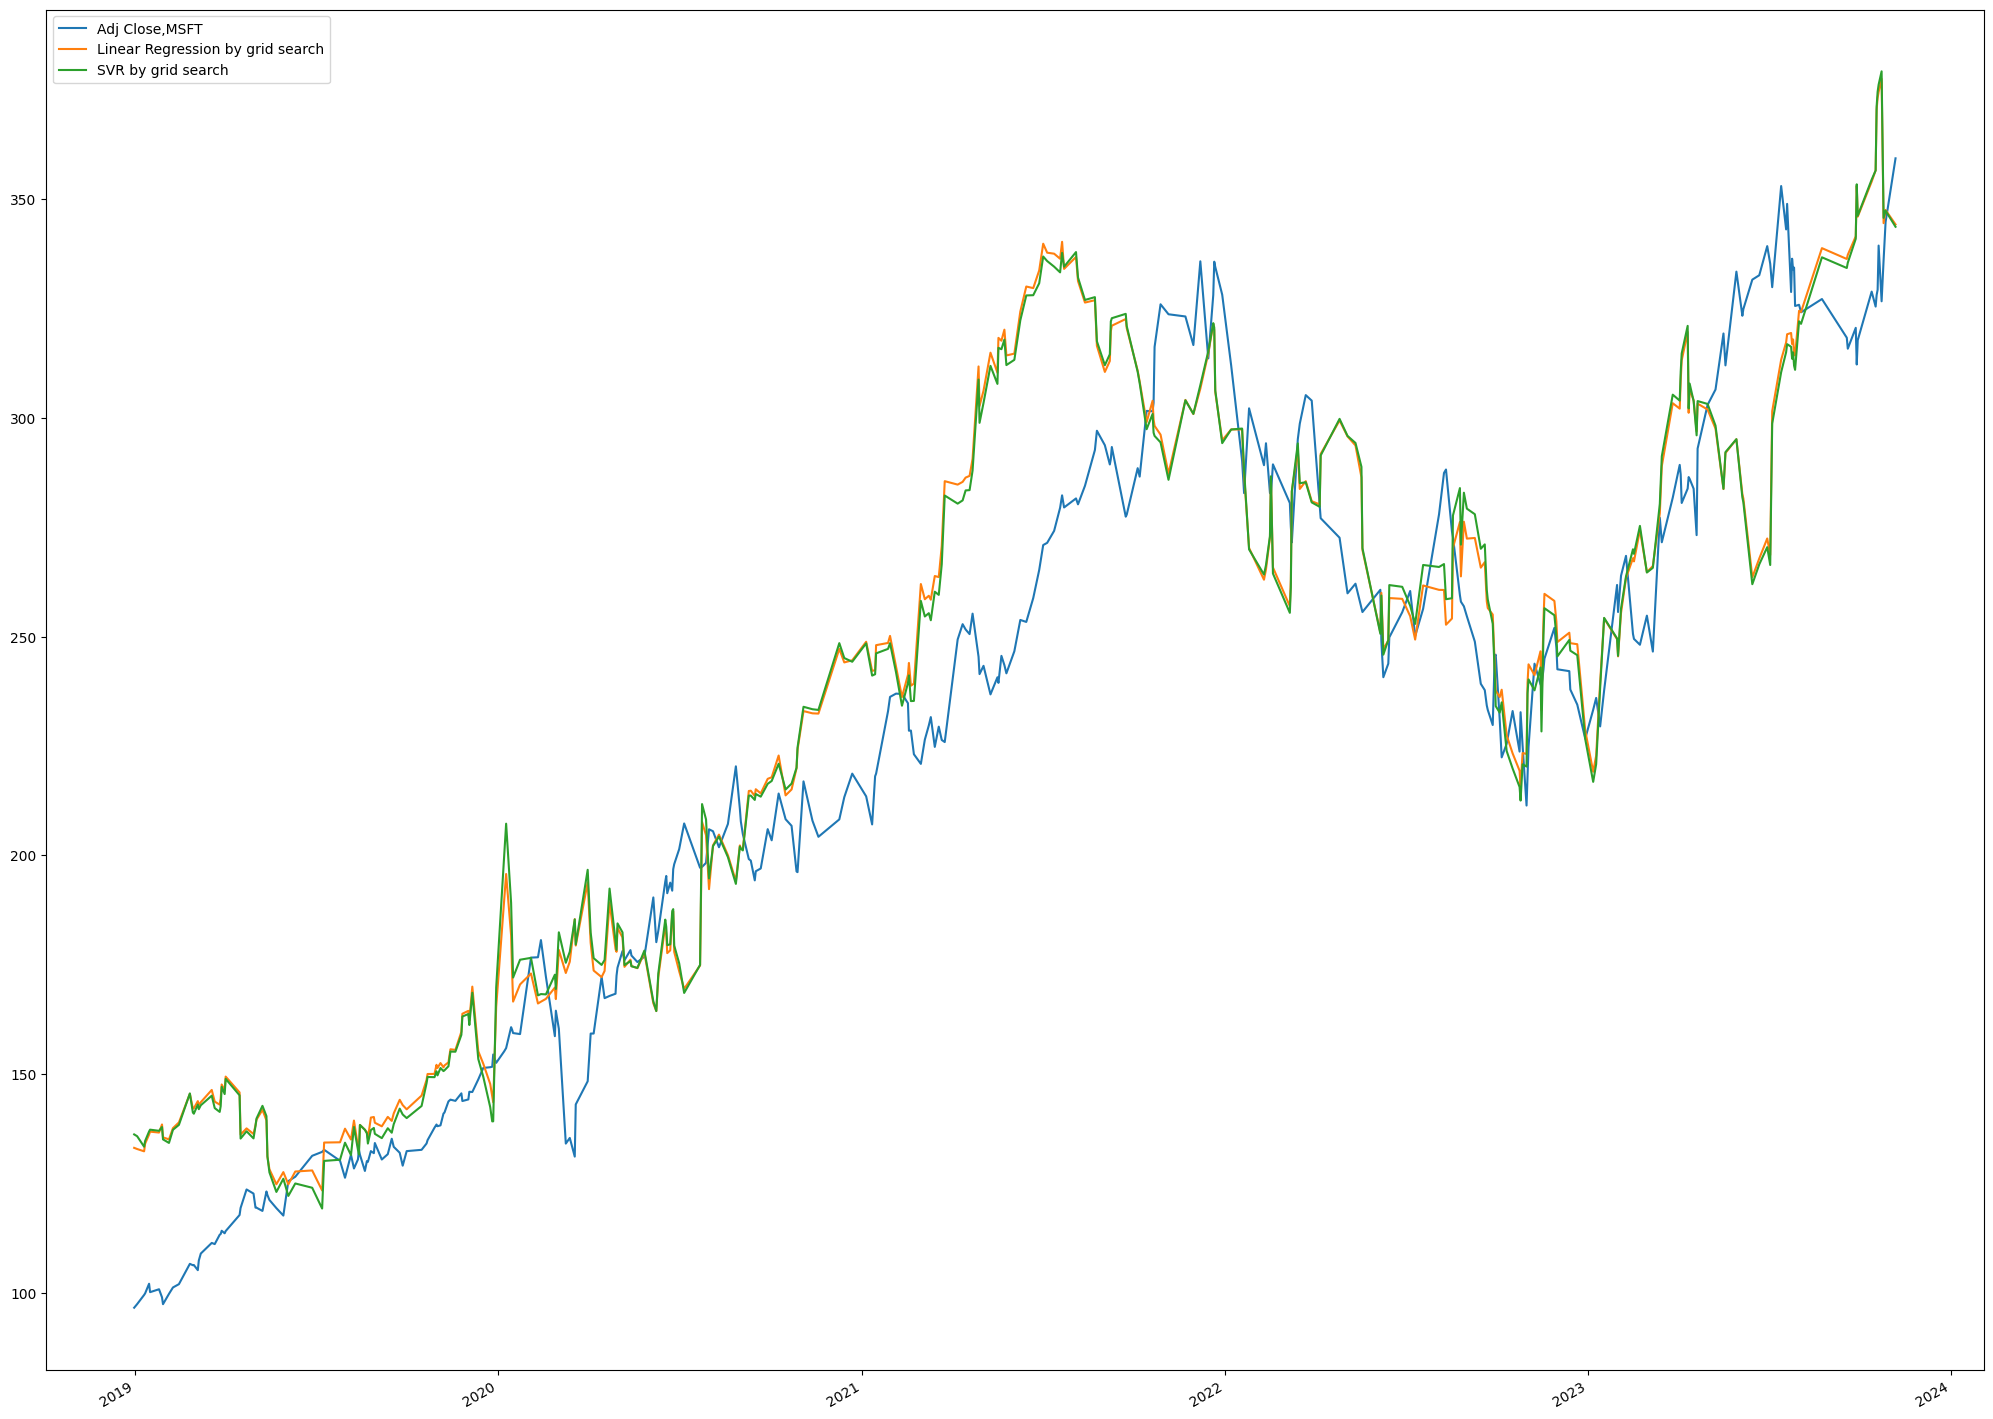

In [ ]:
df_ran= pd.concat([Y_test_df, Y_random_linear,Y_random_svr], axis=1)
df_ran = df_ran.dropna()
lines_ran = df_ran.plot.line(figsize=(25, 20))

### Question
1. Rank Top 3 Best parameters of SVM Models from GridSearchCV.
2. Rank Top 3 Best parameters of SVM Models from RandomizedSearchCV.
3. Are those best parameters from GridSearchCV similar to RandomizedSearchCV? Explain?
4. What is the Mean Squared Error (MSE) for the best parameters obtained through both GridSearchCV and RandomizedSearchCV??